In [41]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Read given data into pandas DataFrame
# Assign column names to attributes described in Data Description
# https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#
filename = 'drug_consumption.data'
column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
                'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
                'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
data = pd.read_csv( filename, header=None )
data.columns = column_names
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [15]:
# Count number of missing values by column
missing_data = data.isnull().sum()
print( missing_data )

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64


In [ ]:
# *** This confirms that there are no values set to null in this data set. HOWEVER, this does not eliminate 
#     the possibility of missing values in other ways ***

In [35]:
print( data['ID'].value_counts().head() )
print ( data['ID'].nunique() == len( data ) )
# *** This indicates that there are no duplicate entries as every ID is unique

2      1
625    1
649    1
647    1
645    1
Name: ID, dtype: int64
True


In [36]:
print( data['ID'] == (data.index + 1))
# *** At first glance, the participant IDs appear to be consecutively assigned. 
# *** After testing to see if each ID corresponded with index + 1, it showed that somewhere there was an inconsistency
# *** On further inspection of the dataset, participants with data['ID'] 299 and 294 were ommitted. 

0        True
1        True
2        True
3        True
4        True
        ...  
1880    False
1881    False
1882    False
1883    False
1884    False
Length: 1885, dtype: bool


In [50]:
data['Ethnicity'].value_counts()

-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
-0.22166      20
 0.12600      20
 1.90725       3
Name: Ethnicity, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='Ethnicity'>

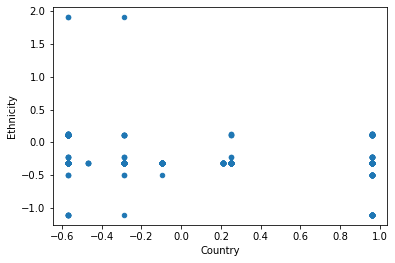

In [46]:
data.plot( x='Country', y='Ethnicity', kind='scatter')
# *** While the countries of interest generally have similar ethnic makeup, it becomes clear that there are outliers.
# *** The ethnicity value of 1.90725 (Mixed-Black/Asian), is only found in countries with values of -0.57009 and -0.28519 
#     (USA and Other, repectively).
# *** The countries with values of -0.46841,-0.09765, and 0.21128 (New Zealand, Australia, and Republic of Ireland) 
#     have significantly fewer ethnic groups. Participants from these countries mainly had an ethnic value of -0.31685 (White).
# *** Meanwhile, the ethnicity value of -1.10702 (Black) is only found in countries -0.57009, -0.28519,and 0.96082
#     (USA, Other, and UK, repectively)
# *** Overall, while it is unclear to which countries the 'Other' category encompasses, the data is skewed in that it has
#     majority White participants because most of the participants reside in countries with a predominantly White population.
#     Despite this skew and the outliers, there is no reason to modify any of this data.

In [48]:
data['Education'].value_counts()

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64

In [49]:
data['Age'].value_counts()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Education'>

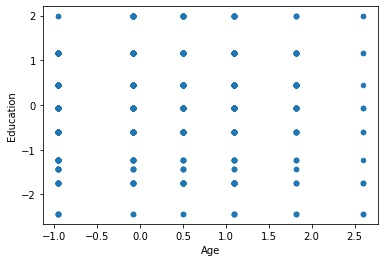

In [47]:
data.plot( x='Age', y='Education', kind='scatter')